# 1) Exploratory Data Analysis

In [1]:
# Installation of required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);


In [2]:
# Reading the dataset
df = pd.read_csv("../input/predicting-churn-for-bank-customers/Churn_Modelling.csv", index_col=0)
df.columns = map(str.lower, df.columns)

In [3]:
# The first 5 observation units of the data set were accessed.
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# The size of the data set was examined. It consists of 10000 observation units and 13 variables.
df.shape

(10000, 13)

In [5]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  object 
 4   gender           10000 non-null  object 
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  int64  
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# Descriptive statistics of the data set accessed.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
creditscore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
numofproducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
hascrcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
isactivemember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimatedsalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [7]:
# The average of the age variable was taken according to the dependent variable.
df.groupby("exited").agg("mean")

,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
exited,,,,,,,,,
0,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [8]:
# The average of the age variable according to the gender variable was examined.
df.groupby("gender").agg({"age": "mean"})

,age
gender,
Female,39.238389
Male,38.658237


In [9]:
# The average of the dependent variable according to the gender variable was examined.
df.groupby("gender").agg({"exited": "mean"})

,exited
gender,
Female,0.250715
Male,0.164559


In [10]:
# The average of the dependent variable according to the geography variable was examined.
df.groupby("geography").agg({"exited": "mean"})

,exited
geography,
France,0.161548
Germany,0.324432
Spain,0.166734


In [11]:
# The frequency of the dependent variable has been reached.
df["exited"].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [12]:
# Access to those who left us through the dependent variable. (exited == 1)
churn = df[df["exited"] == 1]

In [13]:
# The first 5 observation units were reached.
churn.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [14]:
# Size information has been accessed.
churn.shape

(2037, 13)

In [15]:
# Who left most than the gender variable?
churn.groupby("gender").agg({"exited": "count"})

,exited
gender,
Female,1139
Male,898


In [16]:
# Which country has left us the most?
churn.groupby("geography").agg({"exited": "count"})

,exited
geography,
France,810
Germany,814
Spain,413


In [17]:
# Access to those who do not leave us on the dependent variable. (exited == 0)
non_churn = df[df["exited"] == 0]

In [18]:
# The first 5 observation units were reached.
non_churn.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [19]:
# Size information has been accessed.
non_churn.shape

(7963, 13)

In [20]:
# Which country does not leave the most?
non_churn.groupby("geography").agg({"exited": "count"})

,exited
geography,
France,4204
Germany,1695
Spain,2064


In [21]:
# Unique observation units were examined. Surname variable will be examined.
df.nunique()

customerid         10000
surname             2932
creditscore          460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
numofproducts          4
hascrcard              2
isactivemember         2
estimatedsalary     9999
exited                 2
dtype: int64

In [22]:
# What are the most commonly used surnames?
df.groupby('surname')['surname'].count().sort_values(ascending=False).head(10)

surname
Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
Shih        25
Genovese    25
Yeh         25
Maclean     24
Wright      24
Name: surname, dtype: int64

In [23]:
# The most commonly used surname was examined and observed to be non-multiplexing.
df[df["surname"] == "Smith"]

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
235,15704769,Smith,585,France,Female,67,5,113978.97,2,0,1,93146.11,0
480,15797736,Smith,658,France,Male,29,4,80262.60,1,1,1,20612.82,0
746,15640059,Smith,606,France,Male,40,5,0.00,2,1,1,70899.27,0
1065,15699598,Smith,723,France,Female,20,4,0.00,2,1,1,140385.33,0
1757,15670702,Smith,618,France,Male,37,2,168178.21,2,0,1,101273.23,0
2134,15726354,Smith,688,France,Female,32,6,123157.95,1,1,0,172531.23,0
2318,15627212,Smith,630,France,Female,36,2,110414.48,1,1,1,48984.95,0
2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1
3836,15670859,Smith,718,Germany,Female,39,7,93148.74,2,1,1,190746.38,0


In [24]:
# They were grouped by gender variable and looked at how many years on average they were clients.
df.groupby(["gender", "exited"]).agg({"tenure" : "mean"})

tenure
gender exited          
Female 0       4.977086
       1       4.933275
Male   0       5.075236
       1       4.932071

In [25]:
# Min, mean and max values ​​of all variables were taken according to the dependent variable.
df.groupby("exited").agg(["min","mean","max"])

customerid                         creditscore                  age  \
              min          mean       max         min        mean  max min   
exited                                                                       
0        15565701  1.569117e+07  15815690         405  651.853196  850  18   
1        15565706  1.569005e+07  15815656         350  645.351497  850  18   

                      tenure               balance                           \
             mean max    min      mean max     min          mean        max   
exited                                                                        
0       37.408389  92      0  5.033279  10     0.0  72745.296779  221532.80   
1       44.837997  84      0  4.932744  10     0.0  91108.539337  250898.09   

       numofproducts               hascrcard               isactivemember  \
                 min      mean max       min      mean max            min   
exited                                                                      
0                  1  1.544267   3         0  0.707146   1              0   
1                  1  1.475209   4         0  0.699067   1              0   

                     estimatedsalary                            
            mean max             min           mean        max  
exited                                                          
0       0.554565   1           90.07   99738.391772  199992.48  
1       0.360825   1           11.58  101465.677531  199808.10

In [26]:
# Isactivemember is grouped according to the hascrcard variables and the dependent variable is examined.
df.groupby(["isactivemember", "hascrcard"]).agg({"exited" : "count"})

exited
isactivemember hascrcard        
0              0            1401
               1            3448
1              0            1544
               1            3607

In [27]:
# Isactivemember is grouped according to hascrcard variables and the balance variable is examined.
df.groupby(["isactivemember", "hascrcard"]).agg({"balance" : "mean"})

balance
isactivemember hascrcard              
0              0          77825.424525
               1          76853.588646
1              0          78007.318381
               1          74962.849983

In [28]:
# The balance variable was examined according to the gender variable.
df.groupby("gender").agg({"balance": "mean"})

,balance
gender,
Female,75659.369139
Male,77173.974506


In [29]:
# The age variable was divided into 5 parts and the age range in which there is the most abandonment was examined.
df["NewAge"] = pd.qcut(df['age'], 5)
df.groupby("NewAge")["exited"].value_counts()

NewAge          exited
(17.999, 31.0]  0         2191
                1          181
(31.0, 35.0]    0         1615
                1          166
(35.0, 40.0]    0         1927
                1          339
(40.0, 46.0]    0         1211
                1          485
(46.0, 92.0]    0         1019
                1          866
Name: exited, dtype: int64

In [30]:
# The dependent variable was studied according to the gender variable and age range variable.
df.groupby(["gender","NewAge" ])["exited"].value_counts()

gender  NewAge          exited
Female  (17.999, 31.0]  0          959
                        1          107
        (31.0, 35.0]    0          670
                        1           96
        (35.0, 40.0]    0          818
                        1          189
        (40.0, 46.0]    0          525
                        1          263
        (46.0, 92.0]    1          484
                        0          432
Male    (17.999, 31.0]  0         1232
                        1           74
        (31.0, 35.0]    0          945
                        1           70
        (35.0, 40.0]    0         1109
                        1          150
        (40.0, 46.0]    0          686
                        1          222
        (46.0, 92.0]    0          587
                        1          382
Name: exited, dtype: int64

In [31]:
# How many people whose balance is 0 and do not leave?
df[(df["balance"] == 0) & (df["exited"] == 0)].shape

(3117, 14)

In [32]:
# How many people whose balance is 0 leave?
df[(df["balance"] == 0) & (df["exited"] == 1)].shape

(500, 14)

In [33]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 1 variables that act as a positive correlation to the exited dependent variable.
# This variable is Age. As this increases, the Result variable increases.
df.corr()

,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
customerid,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
creditscore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# 2) Data Visualization

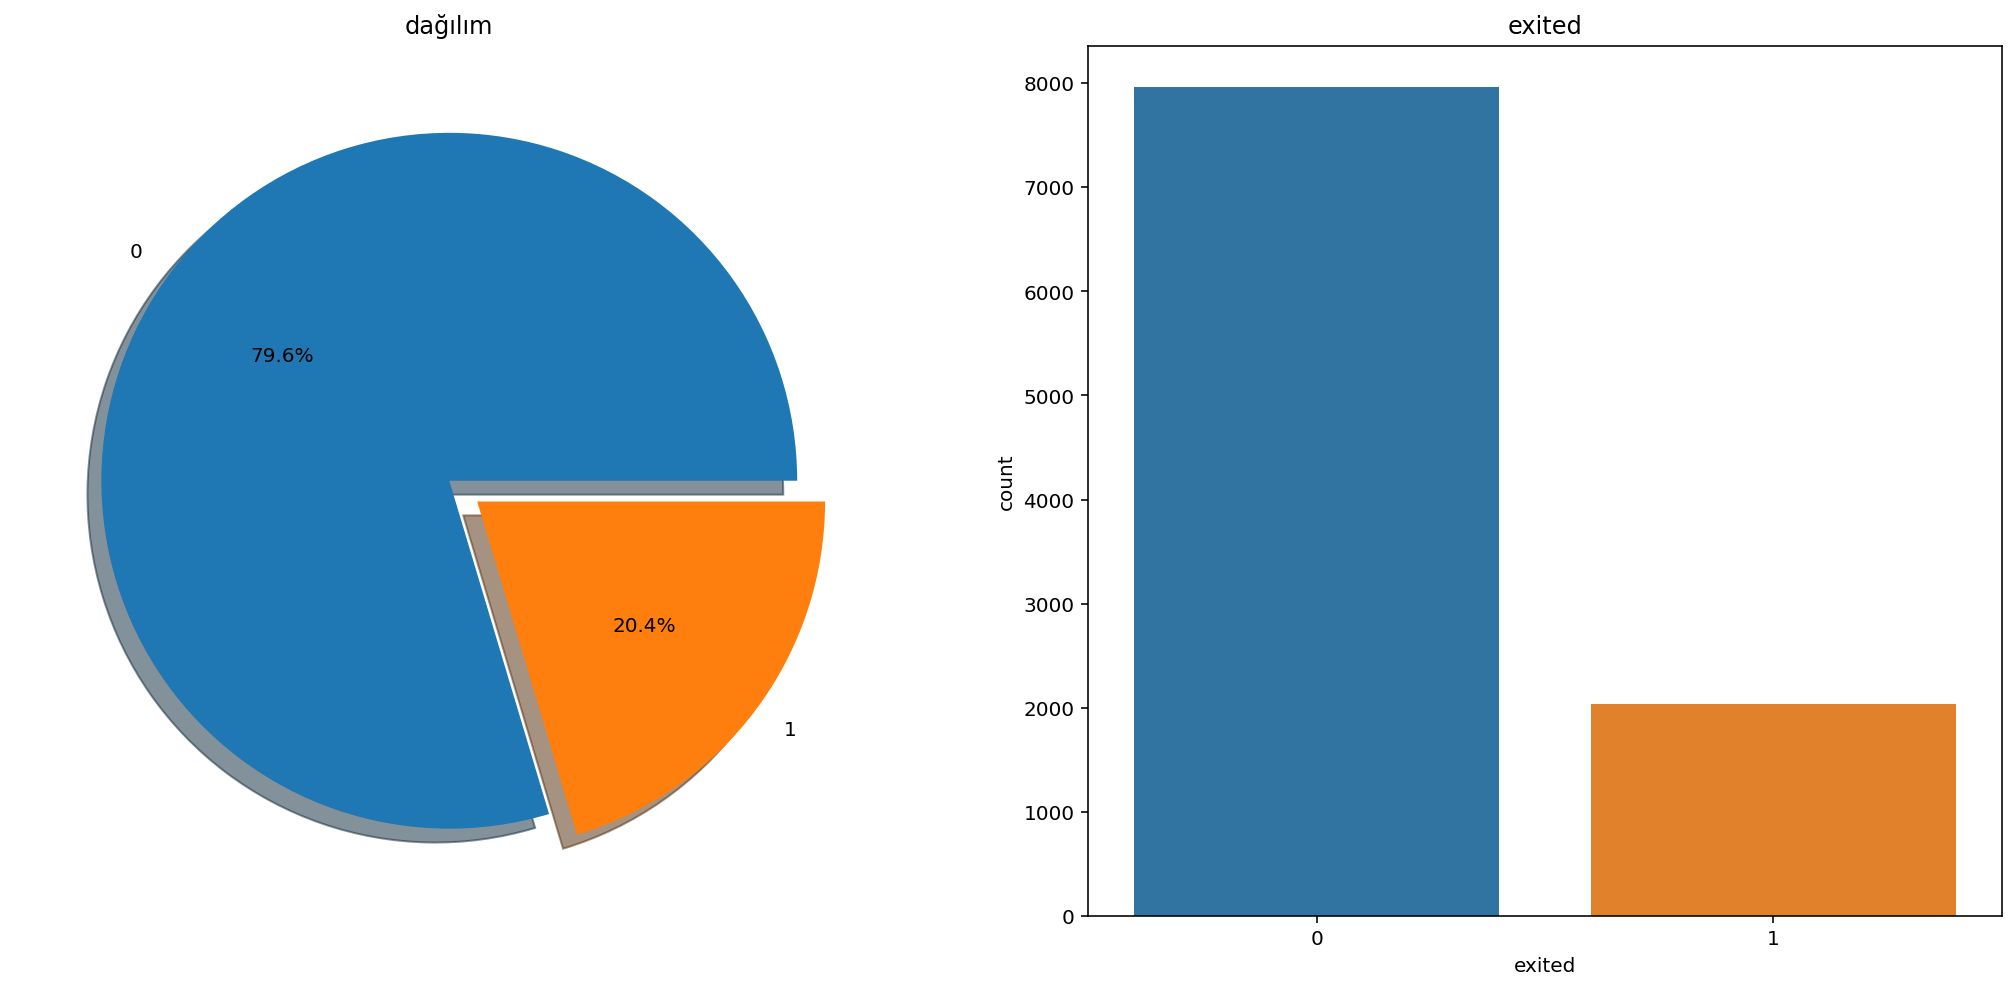

In [34]:
# The distribution of the dependent variable in the dataset is plotted as pie and columns graphs.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dağılım')
ax[0].set_ylabel('')
sns.countplot('exited',data=df,ax=ax[1])
ax[1].set_title('exited')
plt.show()


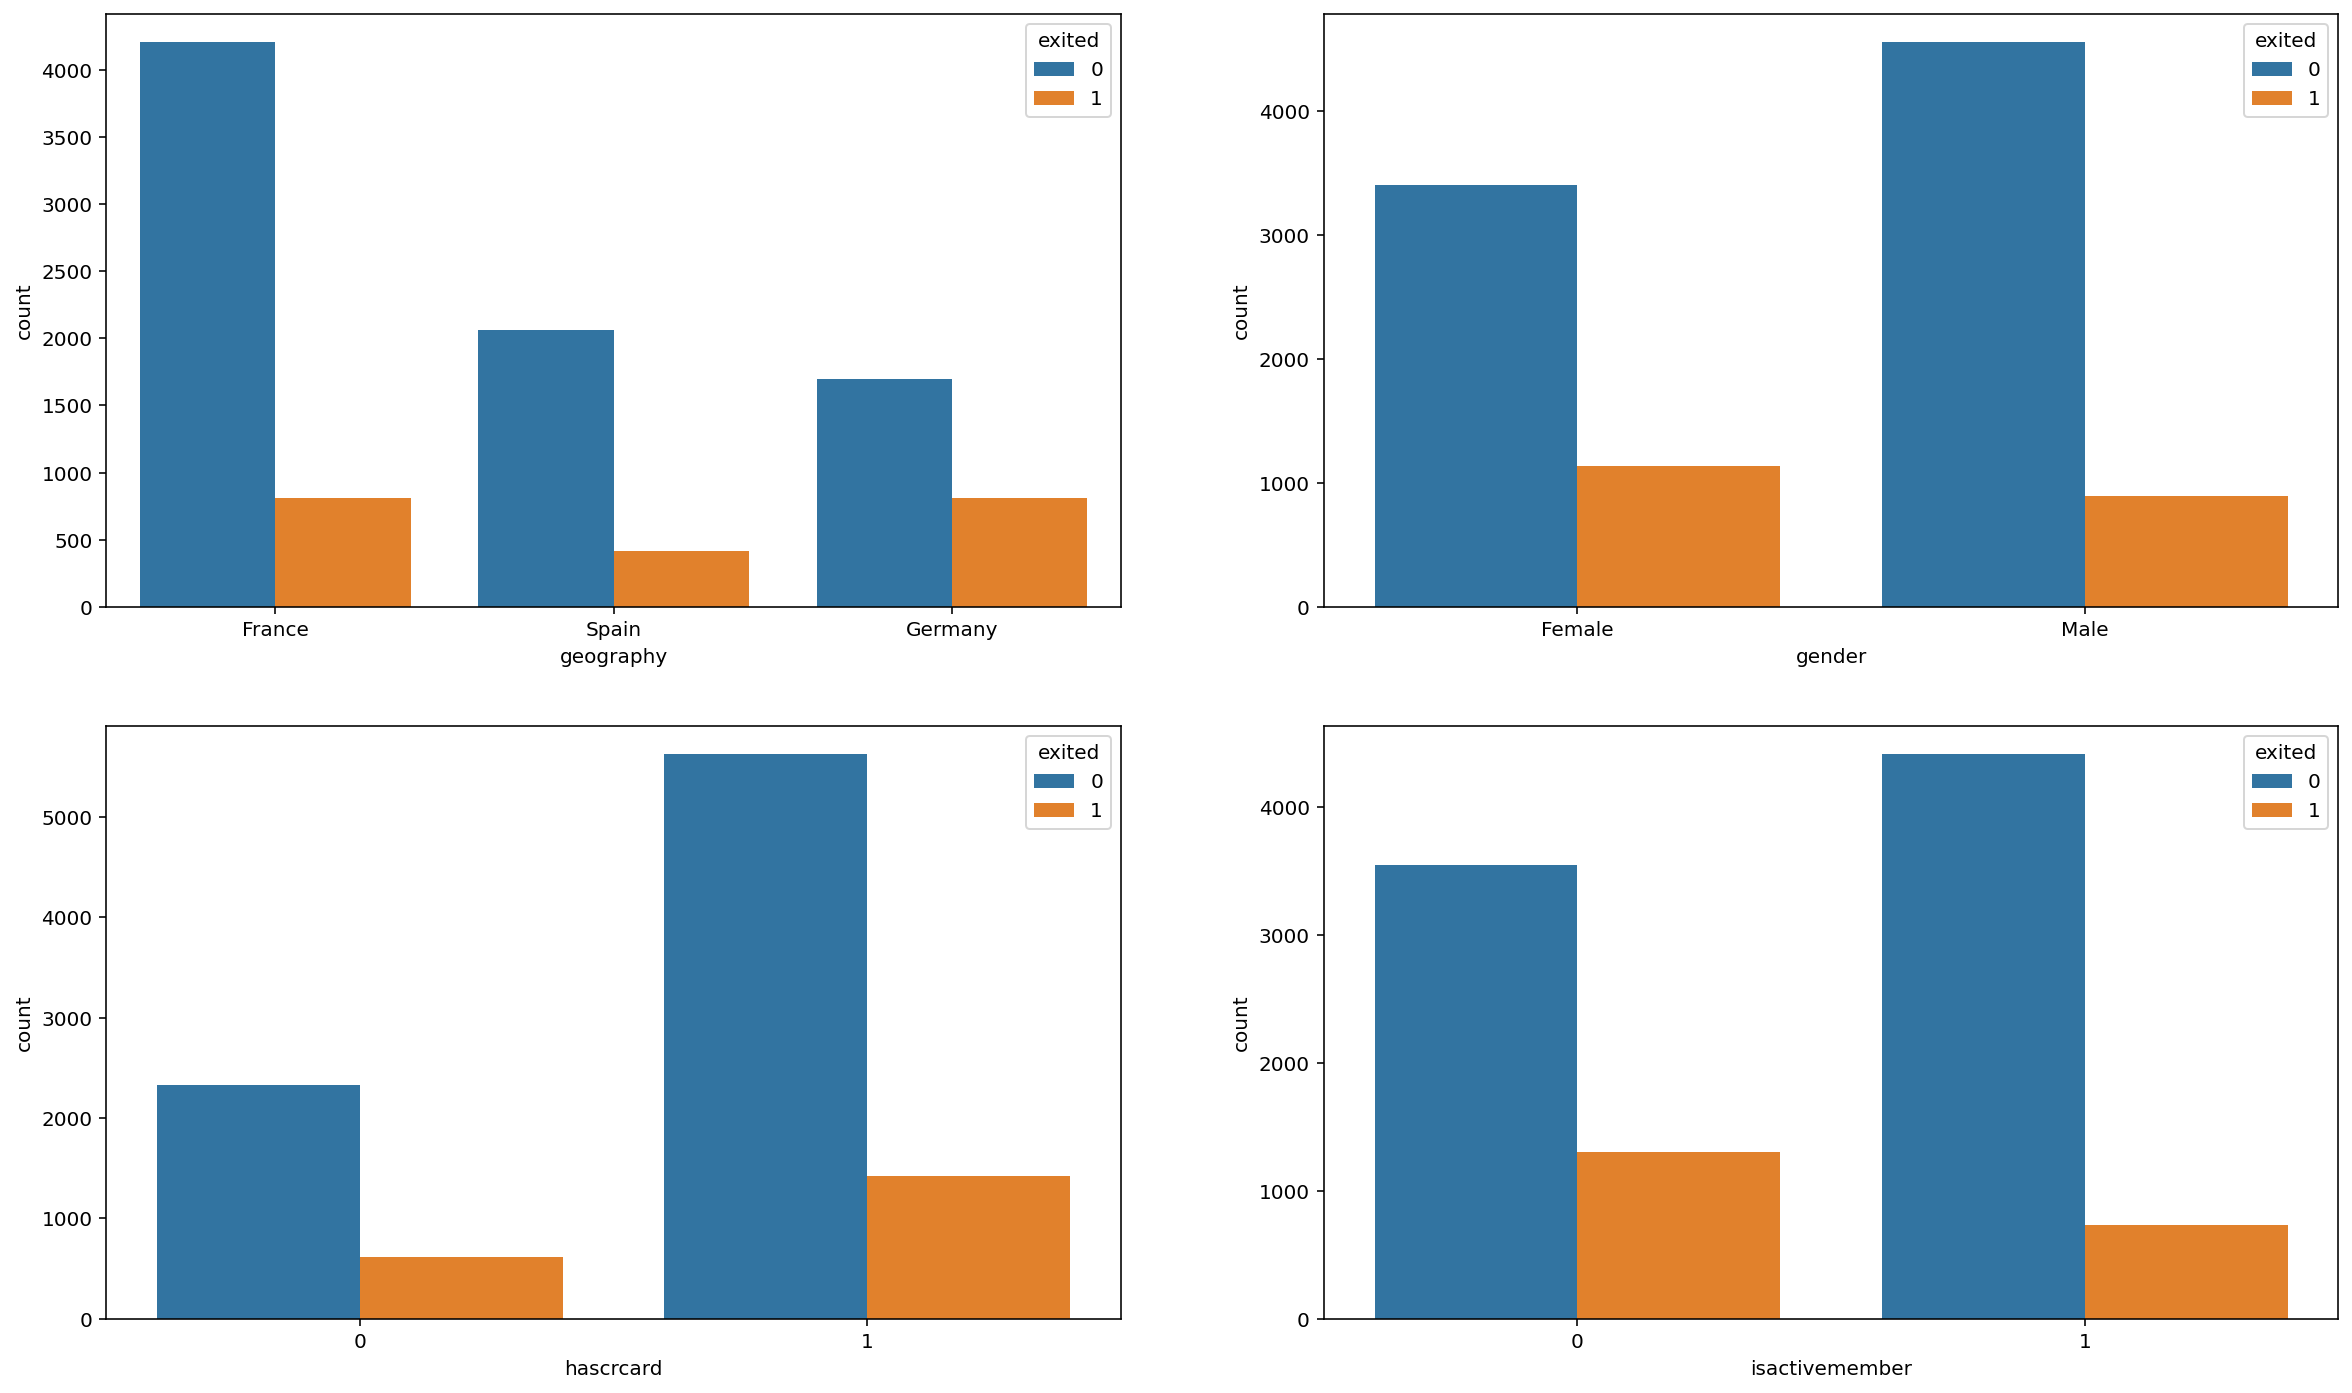

In [35]:
# Plotted the categorical variables on the basis of the graph of the column according to the dependent variable.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='geography', hue = 'exited',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'exited',data = df, ax=axarr[0][1])
sns.countplot(x='hascrcard', hue = 'exited',data = df, ax=axarr[1][0])
sns.countplot(x='isactivemember', hue = 'exited',data = df, ax=axarr[1][1])

In [36]:
# The distribution of the dependent variable according to the gender variable is plotted in the pie chart.
import plotly.express as px
fig = px.pie(df, values =df.groupby("gender")["exited"].value_counts(), names = ["Female,0","Female 1","Male,0","Male,1"])
fig.show()

In [37]:
# Dependent variable was plotted according to age and geography variable.
import plotly.express as px
fig = px.bar(df,y = "exited", x = "age" , color = "geography")
fig.show()

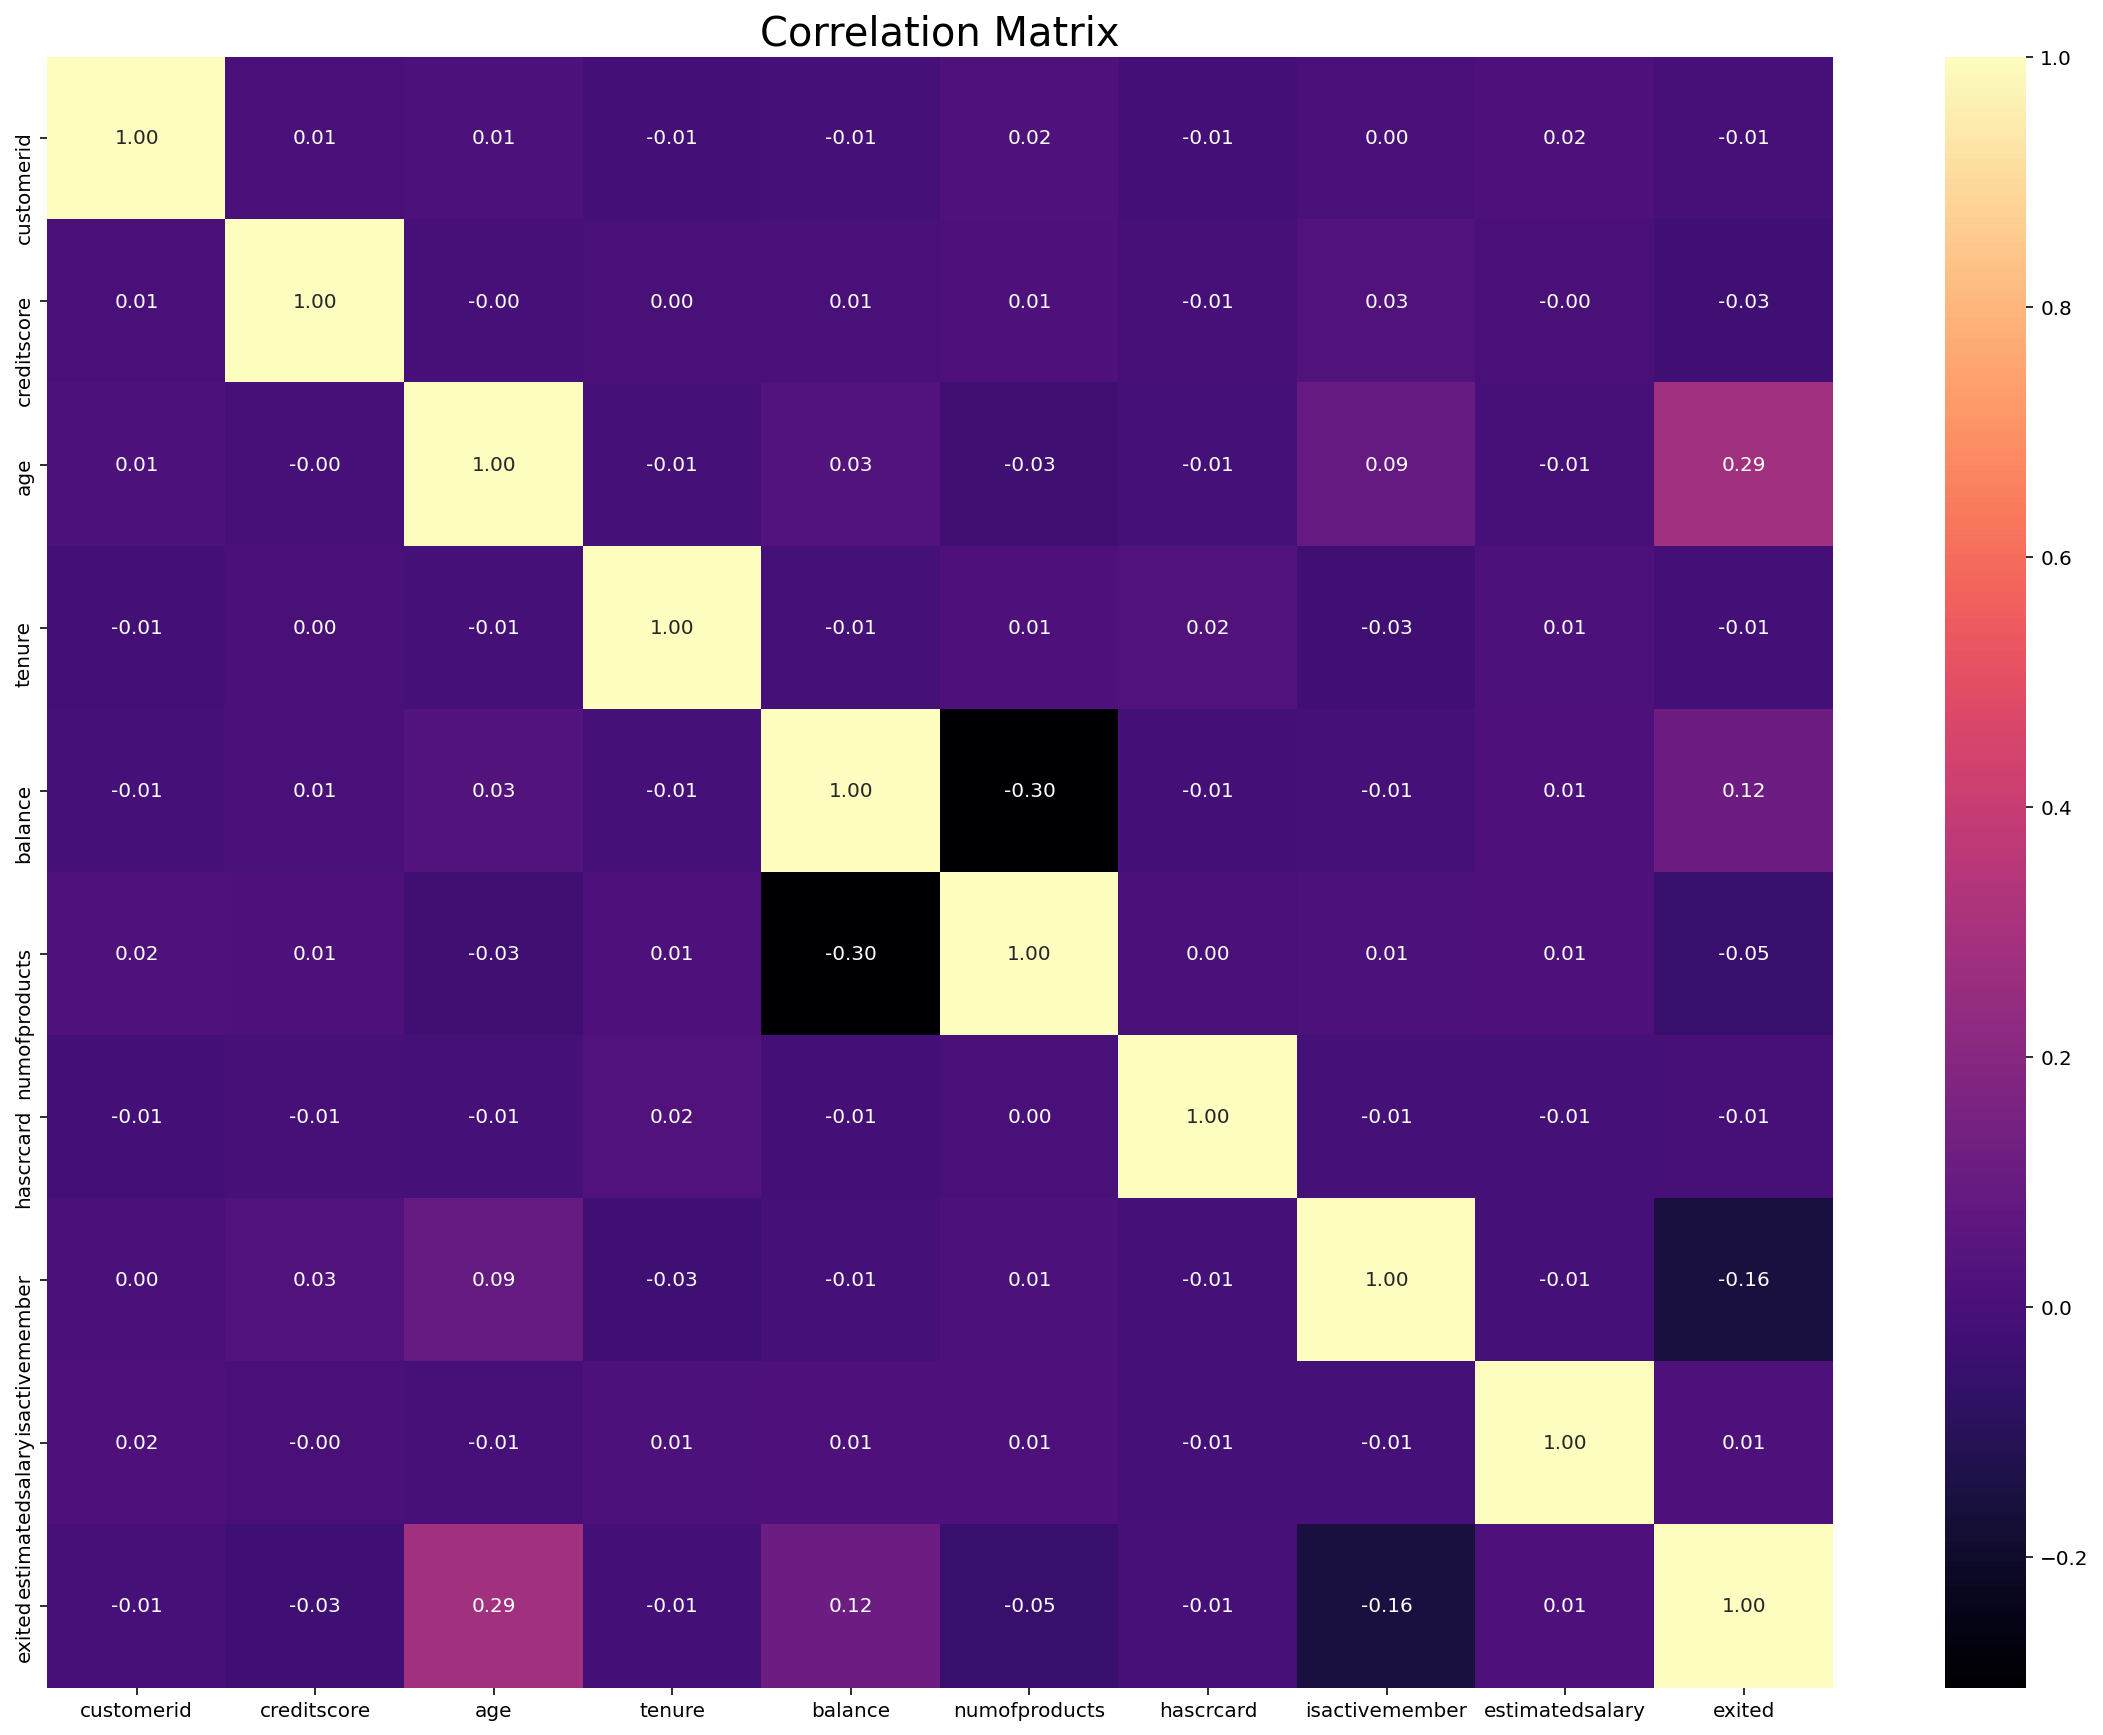

In [38]:
# Correlation Matrix
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

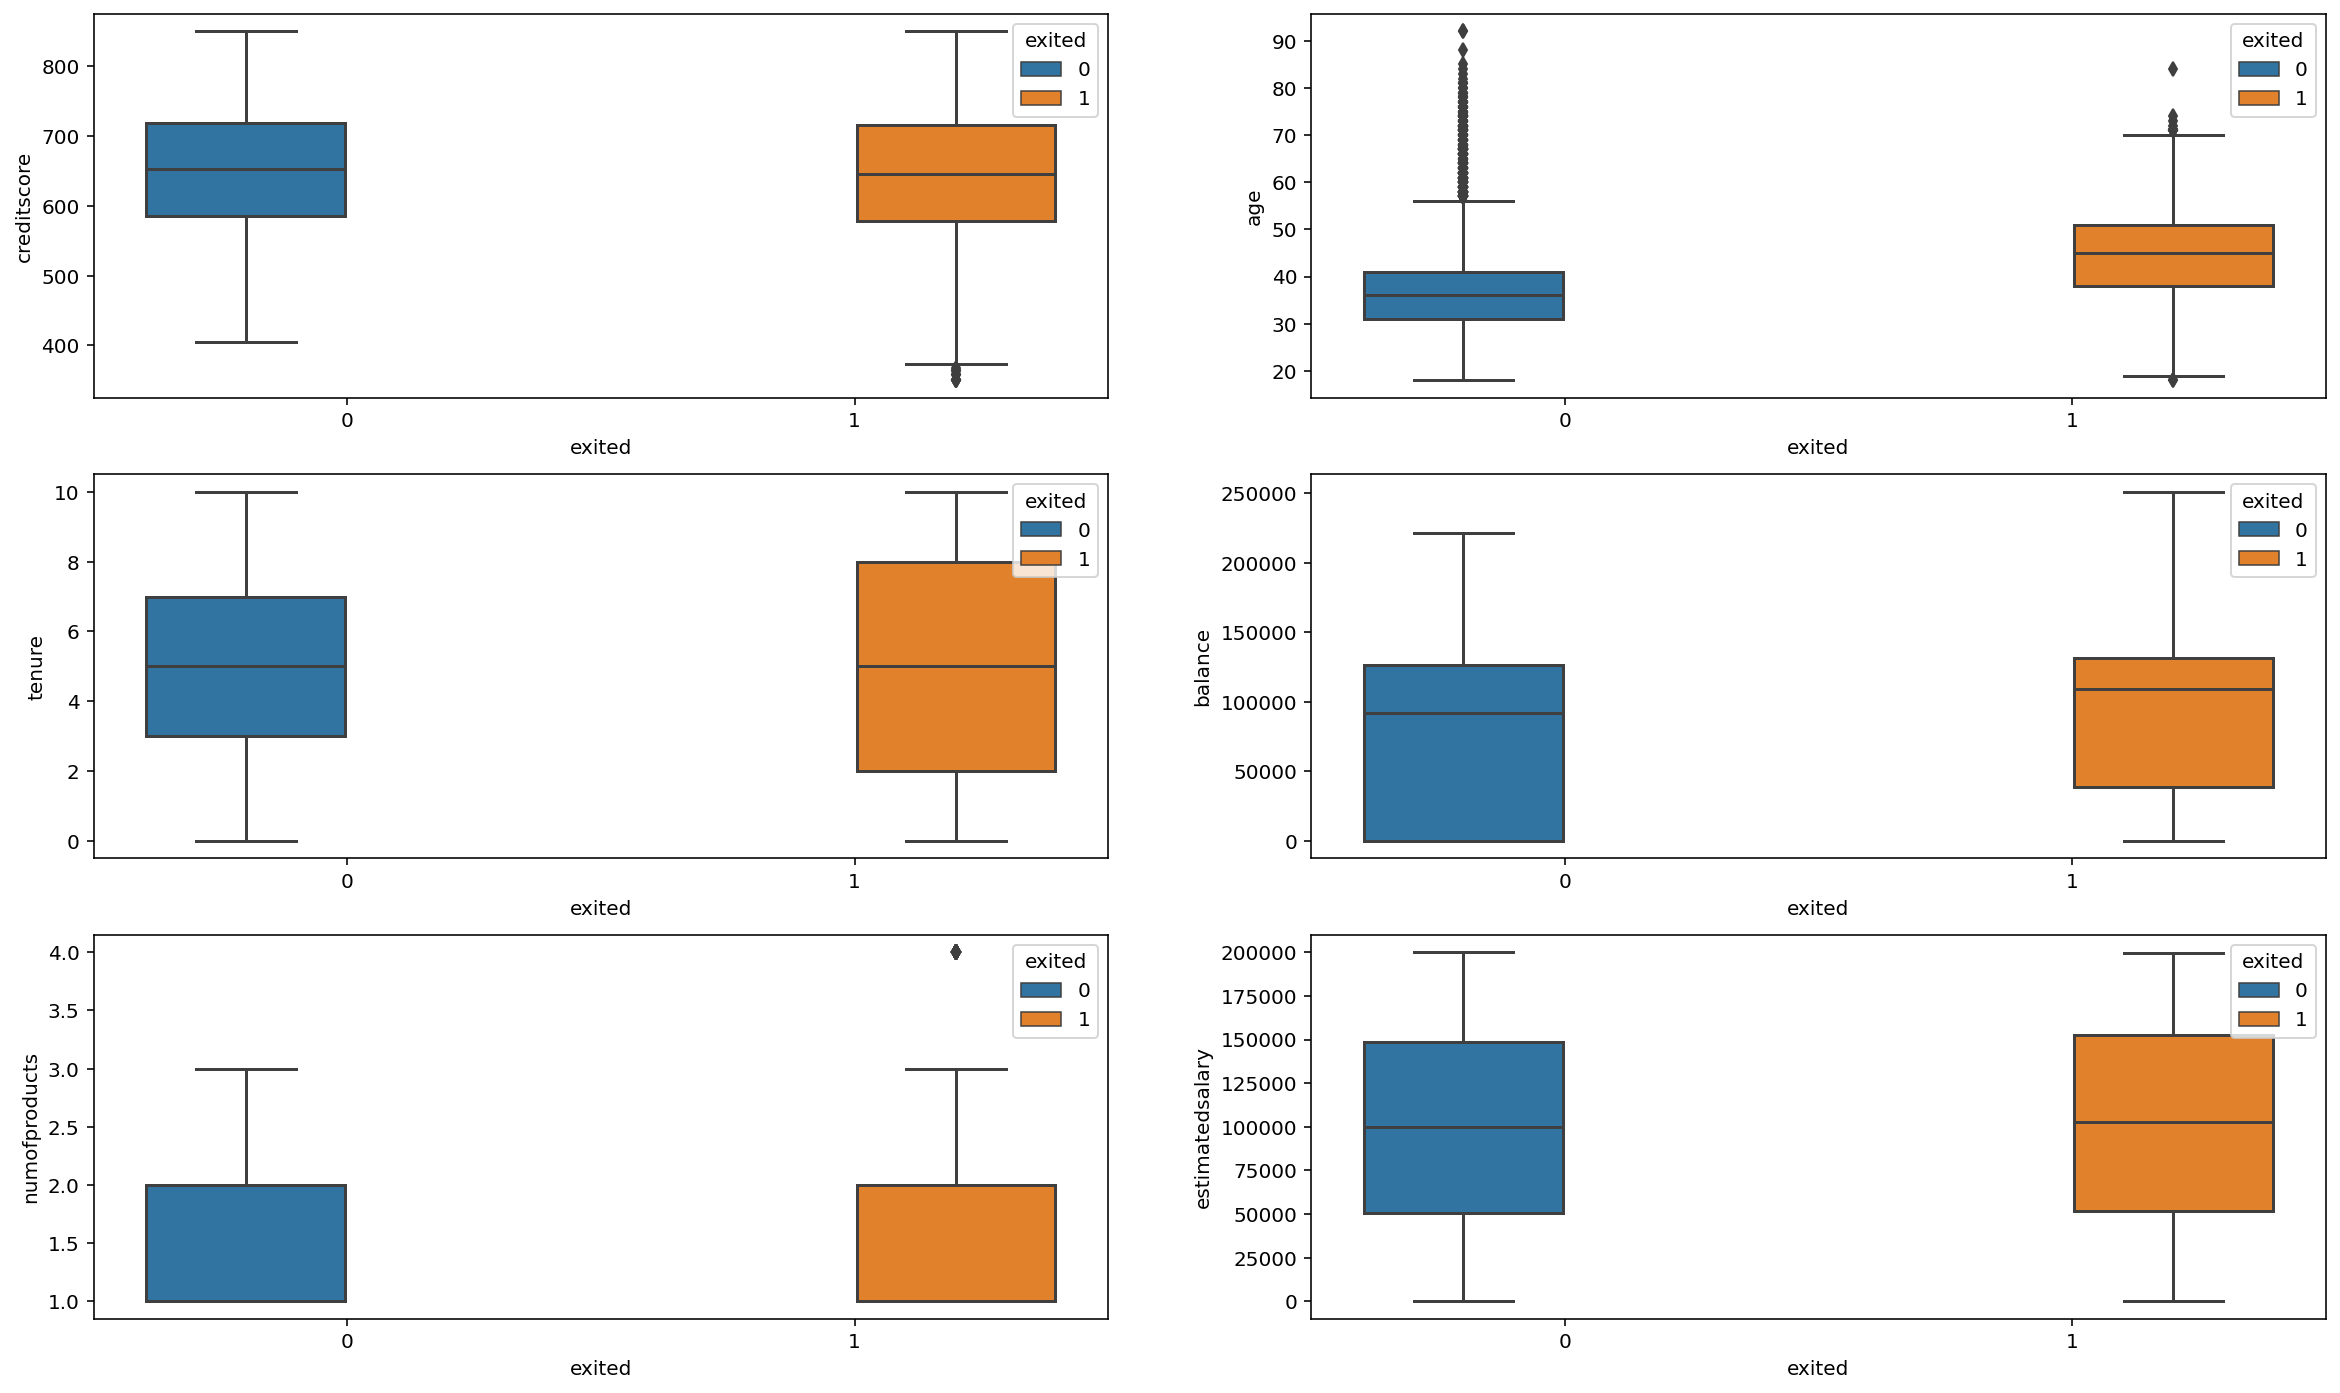

In [39]:
# Boxplot graph for outlier observation analysis
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'exited', hue = 'exited',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'exited', hue = 'exited',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'exited', hue = 'exited',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'exited', hue = 'exited',data = df, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'exited', hue = 'exited',data = df, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'exited', hue = 'exited',data = df, ax=axarr[2][1])

# 3) Data Preprocessing

## 3.1) Missing and Outlier Observation Analysis

In [40]:
# Missing Observation Analysis
df.isnull().sum()

customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
NewAge             0
dtype: int64

In [41]:
# Outlier Observation Analysis
for feature in df[['creditscore','tenure', 'balance','estimatedsalary']]:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

creditscore no
tenure no
balance no
estimatedsalary no


## 3.2) Feature Engineering

In [42]:
df["NewAGT"] = df["age"] - df["tenure"]
df["CreditsScore"] = pd.qcut(df['creditscore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["AgeScore"] = pd.qcut(df['age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["BalanceScore"] = pd.qcut(df['balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["EstSalaryScore"] = pd.qcut(df['estimatedsalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["NewEstimatedSalary"] = df["estimatedsalary"] / 12 

In [43]:
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAge,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
RowNumber,,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(40.0, 46.0]",40,4,6,1,6,8445.740000
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 46.0]",40,4,6,5,6,9378.548333
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 46.0]",34,1,6,10,6,9494.297500
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(35.0, 40.0]",38,7,5,1,5,7818.885833
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(40.0, 46.0]",41,10,6,8,4,6590.341667


## 3.3) One Hot Encoding

In [44]:
df = pd.get_dummies(df, columns =["geography", "gender"], drop_first = True)

In [45]:
df.head()

,customerid,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAge,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,"(40.0, 46.0]",40,4,6,1,6,8445.740000,0,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 46.0]",40,4,6,5,6,9378.548333,0,1,0
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 46.0]",34,1,6,10,6,9494.297500,0,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,"(35.0, 40.0]",38,7,5,1,5,7818.885833,0,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,"(40.0, 46.0]",41,10,6,8,4,6590.341667,0,1,0


In [46]:
df = df.drop(["customerid","surname","NewAge"], axis = 1)

In [47]:
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,40,4,6,1,6,8445.740000,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,40,4,6,5,6,9378.548333,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,34,1,6,10,6,9494.297500,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,38,7,5,1,5,7818.885833,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,41,10,6,8,4,6590.341667,0,1,0


## 3.4) Scaling

In [48]:
cat_df = df[["geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"]]

In [49]:
cat_df.head()

,geography_Germany,geography_Spain,gender_Male,hascrcard,isactivemember
RowNumber,,,,,
1,0,0,0,1,1
2,0,1,0,0,1
3,0,0,0,1,0
4,0,0,0,0,0
5,0,1,0,1,1


In [50]:
y = df["exited"]
X = df.drop(["exited","geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"], axis = 1)
cols = X.columns
index = X.index

In [51]:
X.head()    

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,101348.88,40,4,6,1,6,8445.740000
2,608,41,1,83807.86,1,112542.58,40,4,6,5,6,9378.548333
3,502,42,8,159660.80,3,113931.57,34,1,6,10,6,9494.297500
4,699,39,1,0.00,2,93826.63,38,7,5,1,5,7818.885833
5,850,43,2,125510.82,1,79084.10,41,10,6,8,4,6590.341667


In [52]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [53]:
X = pd.concat([X,cat_df], axis = 1)

In [54]:
X.head()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male,hascrcard,isactivemember
RowNumber,,,,,,,,,,,,,,,,,
1,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,0.666667,-0.2,0.50,-0.9,0.1,0.011739,0,0,0,1,1
2,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0.666667,-0.2,0.50,-0.1,0.1,0.125512,0,1,0,0,1
3,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,0.166667,-0.8,0.50,0.9,0.1,0.139630,0,0,0,1,0
4,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0.500000,0.4,0.25,-0.9,-0.1,-0.064717,0,0,0,0,0
5,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0.750000,1.0,0.50,0.5,-0.3,-0.214561,0,1,0,1,1


In [55]:
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: exited, dtype: int64

In [56]:
print(X.shape, y.shape)

(10000, 17) (10000,)


## 3.5) Train-Test Separation & Balancing

In [57]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=12345)


In [58]:
# Because it's an unstable data set, we're going to increase the number of samples.
# References: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [59]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12692, 17) (3136, 17) (12692,) (3136,)


# 4) Modelling

In [60]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

## 4.1) Accuracy Score

In [61]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.747130)
KNN: (0.756059)
CART: (0.798788)
RF: (0.861926)
SVM: (0.800064)
XGB: (0.889031)
LightGBM: (0.904656)
CatBoost: (0.909439)


## 4.2) Variable Importance Levels of All Models

In [62]:
models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))
models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

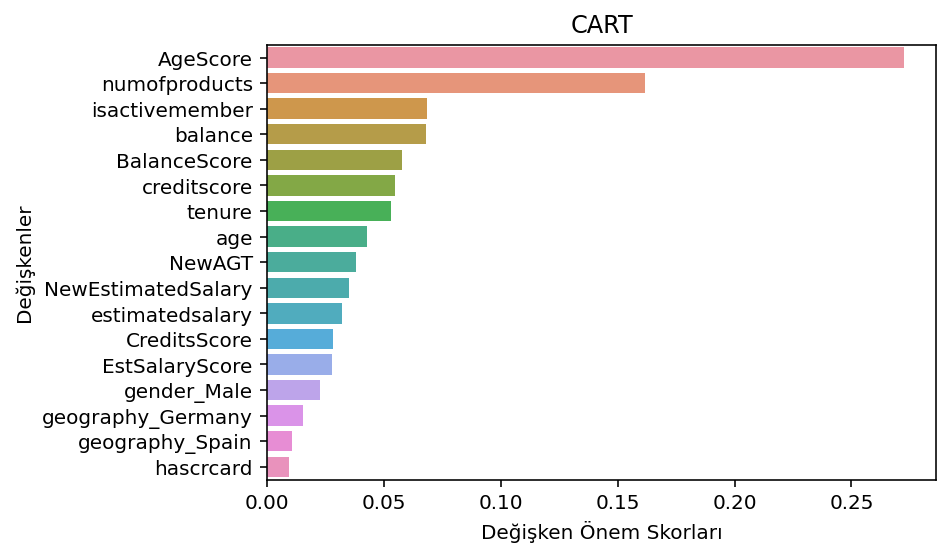

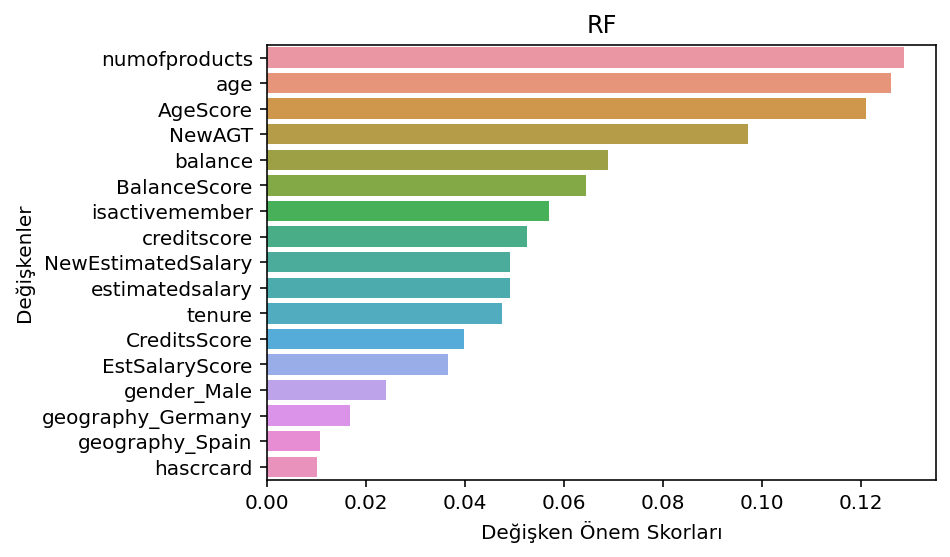

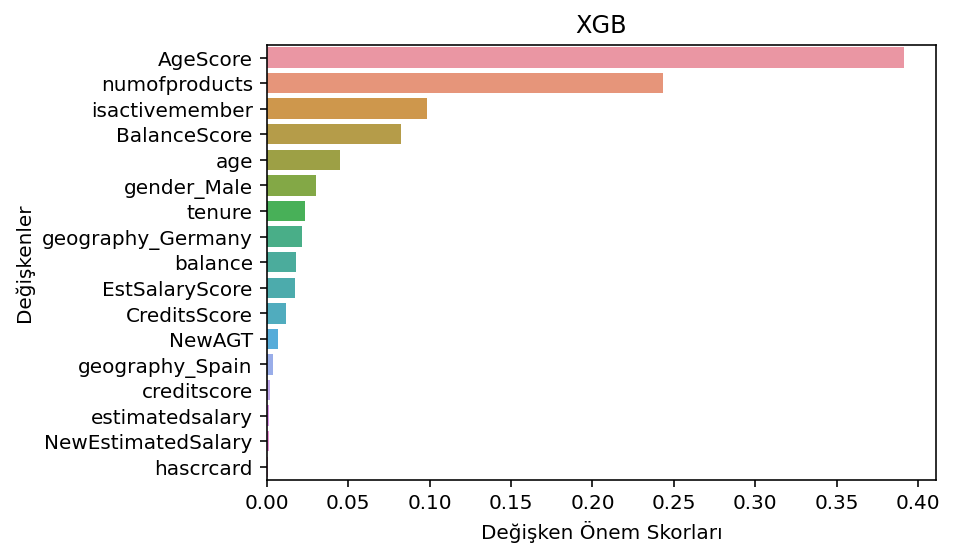

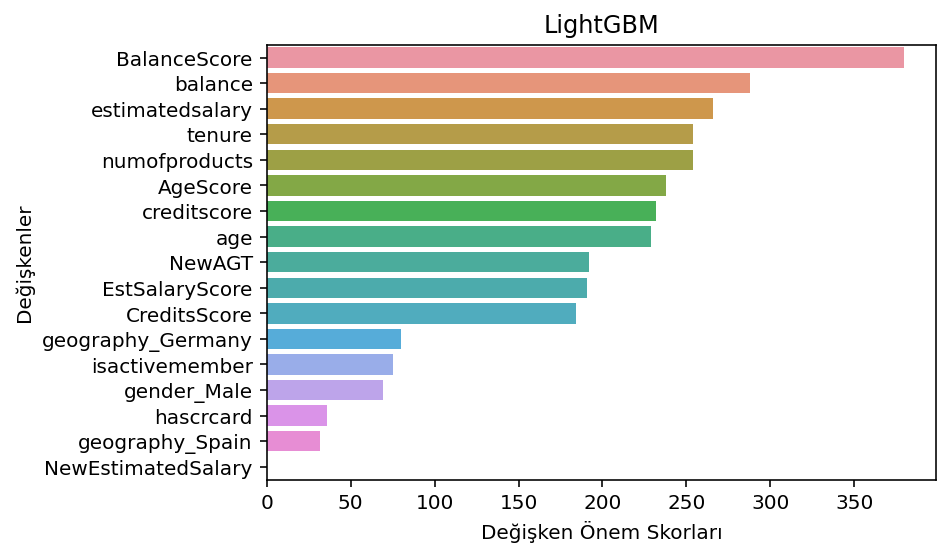

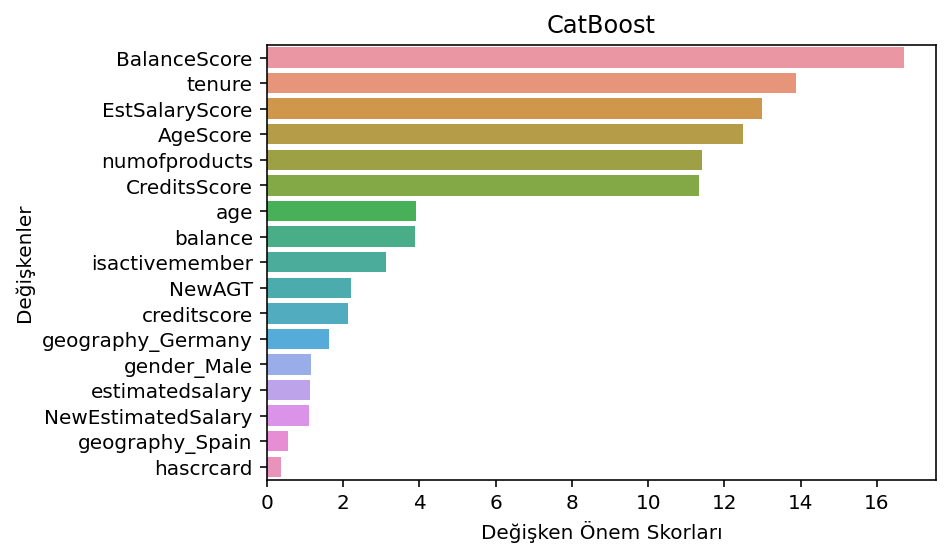

In [63]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

# 5) Model Tuning

In [64]:
# Hyperparameters have previously been obtained with the help of GridSearchCV.
models = []
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

XGB: (0.909120)
LightGBM: (0.911671)
CatBoost: (0.903061)


## 5.1) Model Tuning Variable Importance Level

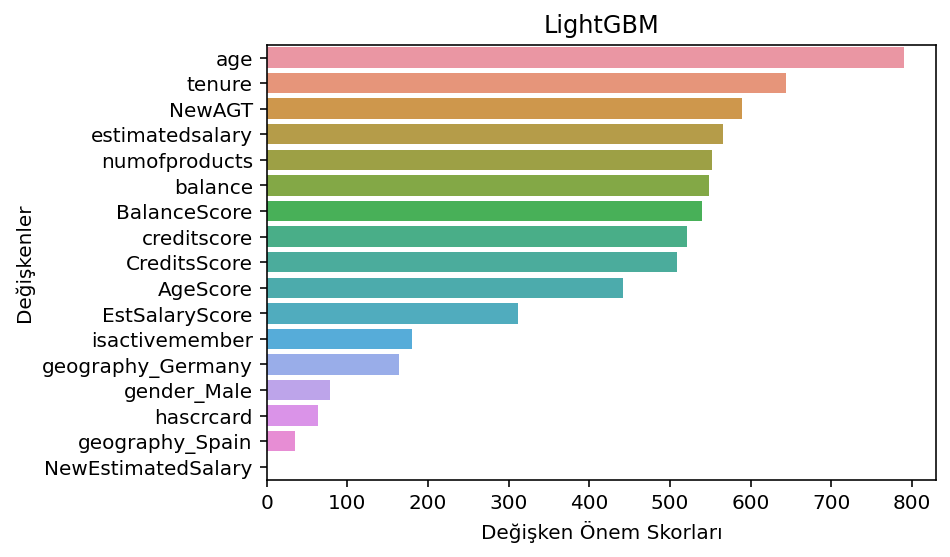

In [65]:
models2 = []
models2.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

#confusion matrix

In [66]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
y_pred = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

In [67]:
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

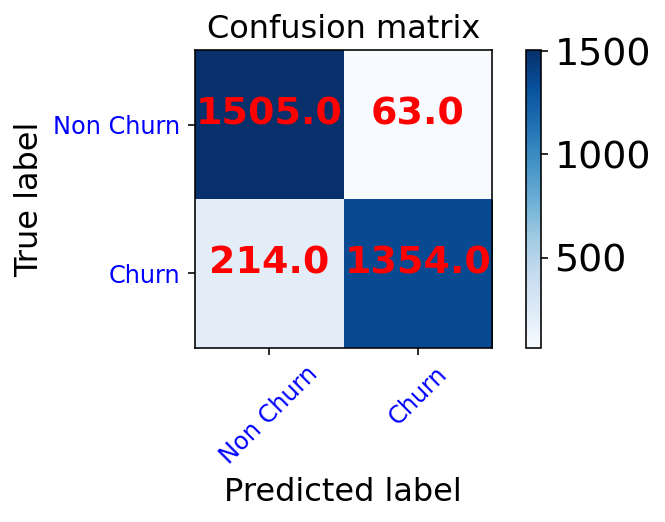

In [68]:
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                      title='Confusion matrix')

In [69]:
tn, fp, fn, tp = cm_xgb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1505
False Positives:  63
False Negatives:  214
True Positives:  1354


In [70]:
df_pred = pd.DataFrame(data=[],columns=["y_test"])
df_pred["y_pred"] = y_pred
df_pred["y_test"] = y_test
df_pred.index = df_pred.index + 1
df_pred.head()

,y_test,y_pred
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0


In [71]:
FP_predicts_indexes = [] 
TP_predicts_indexes=[]
FN_predict_indexes =[]
TN_predicts_indexes  = []
for index, row in df_pred.iterrows():
    if row['y_test'] == 0 and row['y_pred'] == 1:
        FP_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 1:
        TP_predicts_indexes.append(row.name)
    elif row['y_test'] == 0 and row['y_pred'] == 0:
        TN_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 0:
        FN_predict_indexes.append(row.name)    

In [72]:
df_pred.loc[TN_predicts_indexes,"prediction_result"] = "TN"
df_pred.loc[TP_predicts_indexes,"prediction_result"] = "TP"
df_pred.loc[FP_predicts_indexes,"prediction_result"] = "FP"
df_pred.loc[FN_predict_indexes,"prediction_result"] = "FN"
df_pred.head()

,y_test,y_pred,prediction_result
1,0,1,FP
2,0,0,TN
3,0,0,TN
4,0,0,TN
5,0,0,TN


In [73]:
df_pred[df_pred["prediction_result"] == "FP"].head()

,y_test,y_pred,prediction_result
1,0,1,FP
29,0,1,FP
69,0,1,FP
80,0,1,FP
154,0,1,FP


In [74]:
df_pred[df_pred["prediction_result"] == "FN"].head()

,y_test,y_pred,prediction_result
8,1,0,FN
20,1,0,FN
30,1,0,FN
34,1,0,FN
39,1,0,FN


# 7) ROC Curve

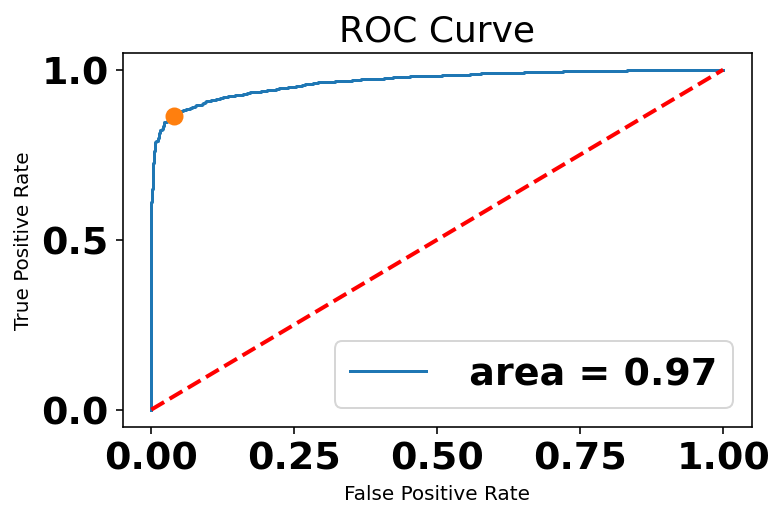

In [75]:
lbgm_tuned = model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
y_pred_prob = lbgm_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# 8) Reporting
The aim of this study was to create classification models for the churn dataset and to predict whether a person abandons us by creating models and to obtain maximum accuracy score in the established models. The work done is as follows:

1) Churn Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. Descriptive statistics of the data set were examined. It was concluded that there were no missing observations and outliers in the data set.

4) During Model Building; Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM, CatBoost like using machine learning models Accuracy  Score were calculated. Later XGBoost, LightGBM, CatBoost hyperparameter optimizations optimized to increase Accuracy score.

5) Result; The model created as a result of LightGBM hyperparameter optimization became the model with the maxium Accuracy Score. **(0.9116)**